In [2]:
pip install simpy

In [6]:
# Loading Libraries
import simpy
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [4]:
# Generating random set of parameters
def generate_random_parameters():
    arrival_rate = random.uniform(0.5, 5)
    service_rate = random.uniform(0.5, 6)
    sim_time = random.randint(50, 200)
    return arrival_rate, service_rate, sim_time

def customer(env, server, service_rate, wait_times):
    arrival_time = env.now
    with server.request() as request:
        yield request
        wait_times.append(env.now - arrival_time)
        service_time = np.random.exponential(1 / service_rate)
        yield env.timeout(service_time)

def run_simulation(arrival_rate, service_rate, sim_time):
    env = simpy.Environment()
    server = simpy.Resource(env, capacity = 1)
    wait_times = []
    def arrivals():
        while True:
            yield env.timeout(np.random.exponential(1 / arrival_rate))
            env.process(customer(env, server, service_rate, wait_times))
    env.process(arrivals())
    env.run(until = sim_time)
    return np.mean(wait_times) if wait_times else 0

simulation_data = []
num_simulations = 1000

for i in range(num_simulations):
    arrival_rate, service_rate, sim_time = generate_random_parameters()
    avg_wait_time = run_simulation(arrival_rate, service_rate, sim_time)
    simulation_data.append([
        arrival_rate,
        service_rate,
        sim_time,
        avg_wait_time
    ])

df = pd.DataFrame(simulation_data, columns = ["arrival_rate", "service_rate", "simulation_time", "avg_wait_time"])
print("Simulation Data\n", df)

Simulation Data
      arrival_rate  service_rate  simulation_time  avg_wait_time
0        2.658960      5.746772               84       0.145945
1        1.819312      1.007423              151      22.973939
2        0.658816      4.960234              169       0.035104
3        3.199884      1.865830              185      35.344514
4        3.902900      0.726581               94      39.389177
..            ...           ...              ...            ...
995      2.058873      4.708105              179       0.157000
996      2.085405      1.328527              131      34.485128
997      3.082713      1.871208              102      19.962808
998      4.583489      1.835059              158      37.835512
999      2.690914      5.352524              141       0.183596

[1000 rows x 4 columns]


In [5]:
# Machine Learning Model Comparison
X = df[["arrival_rate", "service_rate", "simulation_time"]]
y = df["avg_wait_time"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators = 100),
    "Support Vector Regression": SVR(),
    "KNN Regressor": KNeighborsRegressor()
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    results.append({
        "Model": name,
        "RMSE": rmse,
        "R2 score": r2
    })
results_df = pd.DataFrame(results).sort_values("RMSE")
print("Model Comparison Table\n")
print(results_df)
best_model = results_df.iloc[0]
print("Best Performing Model\n")
print(best_model)

Model Comparison Table

                       Model      RMSE  R2 score
4              KNN Regressor  3.085295  0.962909
2              Random Forest  3.180631  0.960581
1              Decision Tree  4.070351  0.935444
3  Support Vector Regression  5.387575  0.886900
0          Linear Regression  9.636817  0.638139
Best Performing Model

Model       KNN Regressor
RMSE             3.085295
R2 score         0.962909
Name: 4, dtype: object


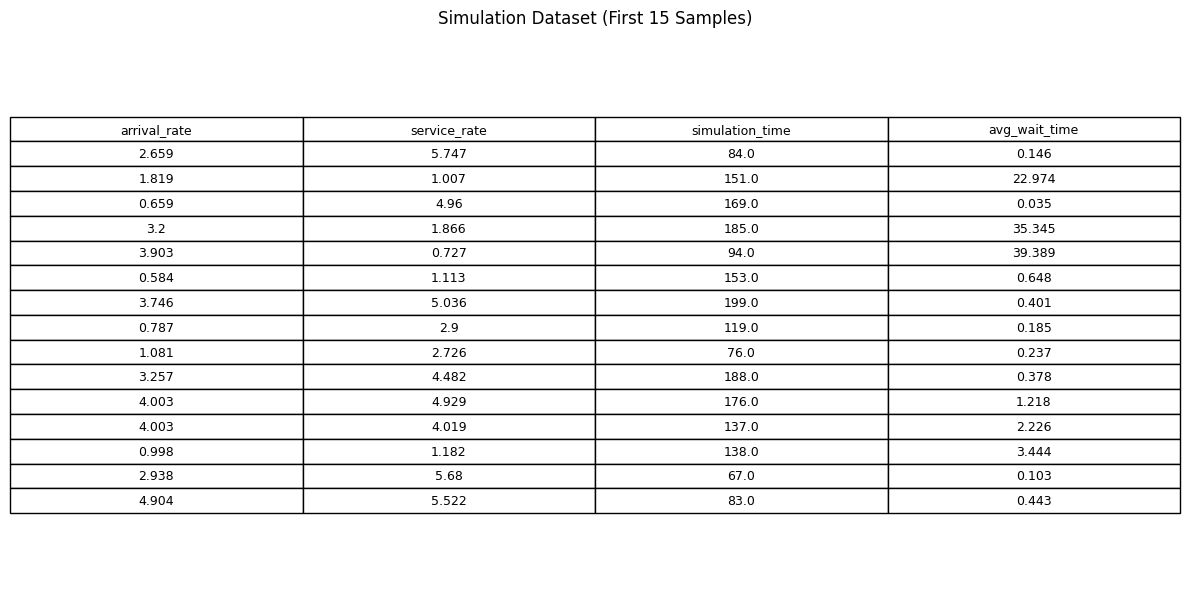

In [9]:
# Graphical Display of Dataset
df_display = df.head(15).round(3)
plt.figure(figsize = (12, 6))
plt.axis('off')

table = plt.table(
    cellText = df_display.values,
    colLabels = df_display.columns,
    loc = 'center',
    cellLoc = 'center'
)

table.scale(1, 1.3)
table.auto_set_font_size(False)
table.set_fontsize(9)

plt.title("Simulation Dataset (First 15 Samples)", pad = 20)
plt.tight_layout()

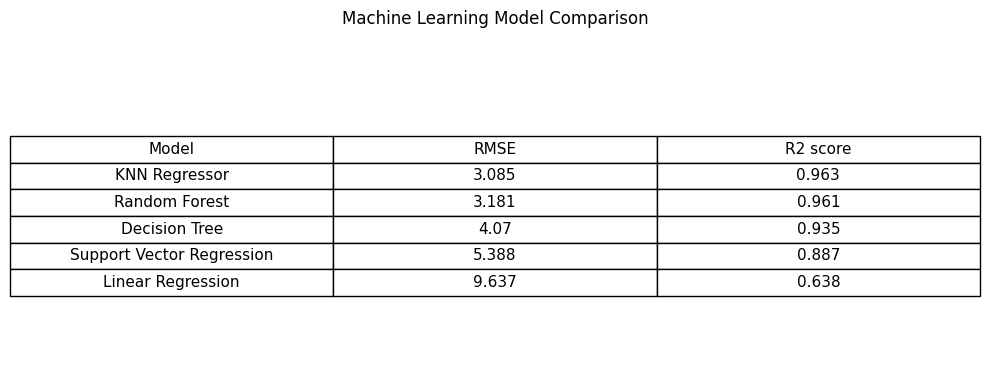

In [8]:
# Graphical display of table
results_df_rounded = results_df.round(3)
plt.figure(figsize = (10, 4))
plt.axis('off')

table = plt.table(
    cellText = results_df_rounded.values,
    colLabels = results_df_rounded.columns,
    loc = 'center',
    cellLoc = 'center'
)

table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(11)

plt.title("Machine Learning Model Comparison", pad = 20)
plt.tight_layout()